In [1]:
#Importing the required libraries for EDA (Exploratory data analysis)
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
plt.style.use('fivethirtyeight')
%matplotlib inline     
sns.set(color_codes=True)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [2]:
df.shape

NameError: name 'df' is not defined

In [2]:
df = pd.read_csv("globalterrorismdb_0221dist.csv")
# To display the top 5 rows 
df.head(5)    

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201183 entries, 0 to 201182
Columns: 135 entries, eventid to related
dtypes: float64(53), int64(24), object(58)
memory usage: 207.2+ MB


In [3]:
df.keys()

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [4]:
df.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [5]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,2.011830e+05,201183.000000,201183.000000,201183.000000,201183.000000,201183.000000,201183.000000,196556.000000,196555.000000,201182.000000,...,1.485000e+03,6.900000e+02,9.070000e+02,678.000000,13185.000000,12595.000000,201183.000000,201183.000000,201183.000000,201183.000000
mean,2.004225e+11,2004.158478,6.451678,15.520983,0.049915,131.448398,7.253600,23.356215,29.784881,1.465409,...,2.862275e+06,3.415798e+05,6.489832e+05,195.564897,4.683656,-31.267646,-4.458930,-4.374699,0.087746,-3.878002
std,1.342944e+09,13.429481,3.387376,8.808477,0.217769,111.919230,2.914629,18.224189,56.602962,0.988601,...,2.871566e+07,5.162443e+06,9.414912e+06,2654.872863,2.035030,64.515177,4.543925,4.640540,0.545811,4.682635
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-176.176447,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.992022e+11,1992.000000,4.000000,8.000000,0.000000,75.000000,6.000000,11.506724,8.644191,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.011031e+11,2011.000000,6.000000,15.000000,0.000000,101.000000,8.000000,31.250196,43.659053,1.000000,...,1.138790e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,0.000000,-9.000000,0.000000,0.000000
75%,2.015072e+11,2015.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.558524,68.810806,1.000000,...,3.500000e+05,0.000000e+00,8.882000e+02,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.019123e+11,2019.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,179.366667,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2958.000000,1.000000,1.000000,1.000000,1.000000


##### Renaming the columns

In [6]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country':'Country_Code','country_txt':'Country_Name','region':'Region_Code','region_txt':'Region_Name','provstate':'State','city':'City','attacktype1':'AttackType_Code','attacktype1_txt':'AttackType_Name','targtype1':'Targtype_Code','targtype1_txt':'Targtype_Name','targsubtype1':'Targsubtype_code','targsubtype1_txt':'Targsubtype_Occupation','gname':'Group_Name','weaptype1':'Weaptype1_Code','weaptype1_txt':'Weaptype1_Name','weapsubtype1':'Weapsubtype1_Code','weapsubtype1_txt':'Weapsubtype1_Name','nkill':'Killed','nwound':'Wounded'},inplace=True)

##### Dropping irrelevant columns

In [8]:
df=df[['Year','Month','Day','Country_Code','Country_Name','Region_Code','Region_Name','State','City','AttackType_Code','AttackType_Name','Targtype_Code','Targtype_Name','Targsubtype_code','Targsubtype_Occupation','Group_Name','Weaptype1_Code','Weaptype1_Name','Weapsubtype1_Code','Weapsubtype1_Name','Killed','Wounded']] 

In [6]:
df.keys()

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [11]:
df.describe()

,Year,Month,Day,Country_Code,Region_Code,AttackType_Code,Targtype_Code,Targsubtype_code,Weaptype1_Code,Weapsubtype1_Code,Killed,Wounded
count,201183.000000,201183.000000,201183.000000,201183.000000,201183.000000,201183.000000,201183.000000,189729.000000,201183.000000,177008.000000,189233.000000,182259.000000
mean,2004.158478,6.451678,15.520983,131.448398,7.253600,3.314947,8.476362,47.121146,6.508706,11.088069,2.411044,3.126007
std,13.429481,3.387376,8.808477,111.919230,2.914629,1.989192,6.620949,30.729765,2.254748,6.483374,11.252288,41.728920
min,1970.000000,0.000000,0.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1992.000000,4.000000,8.000000,75.000000,6.000000,2.000000,3.000000,22.000000,5.000000,5.000000,0.000000,0.000000
50%,2011.000000,6.000000,15.000000,101.000000,8.000000,3.000000,4.000000,35.000000,6.000000,12.000000,0.000000,0.000000
75%,2015.000000,9.000000,23.000000,160.000000,10.000000,3.000000,14.000000,74.000000,6.000000,16.000000,2.000000,2.000000
max,2019.000000,12.000000,31.000000,1004.000000,12.000000,9.000000,22.000000,113.000000,13.000000,31.000000,1570.000000,10878.000000


In [9]:
df.keys()

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [12]:
df.dtypes

Year                        int64
Month                       int64
Day                         int64
Country_Code                int64
Country_Name               object
Region_Code                 int64
Region_Name                object
State                      object
City                       object
AttackType_Code             int64
AttackType_Name            object
Targtype_Code               int64
Targtype_Name              object
Targsubtype_code          float64
Targsubtype_Occupation     object
Group_Name                 object
Weaptype1_Code              int64
Weaptype1_Name             object
Weapsubtype1_Code         float64
Weapsubtype1_Name          object
Killed                    float64
Wounded                   float64
dtype: object

In [13]:
df.shape

(201183, 22)

##### Dropping the duplicate rows

In [14]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (13213, 22)


In [15]:
df = df.drop_duplicates()
#df.head(5)

In [16]:
df.count()      # Used to count the number of rows

Year                      187970
Month                     187970
Day                       187970
Country_Code              187970
Country_Name              187970
Region_Code               187970
Region_Name               187970
State                     187970
City                      187553
AttackType_Code           187970
AttackType_Name           187970
Targtype_Code             187970
Targtype_Name             187970
Targsubtype_code          177680
Targsubtype_Occupation    177680
Group_Name                187970
Weaptype1_Code            187970
Weaptype1_Name            187970
Weapsubtype1_Code         166237
Weapsubtype1_Name         166237
Killed                    177270
Wounded                   170568
dtype: int64

##### Dropping the missing or null values.

In [17]:
print(df.isnull().sum())

Year                          0
Month                         0
Day                           0
Country_Code                  0
Country_Name                  0
Region_Code                   0
Region_Name                   0
State                         0
City                        417
AttackType_Code               0
AttackType_Name               0
Targtype_Code                 0
Targtype_Name                 0
Targsubtype_code          10290
Targsubtype_Occupation    10290
Group_Name                    0
Weaptype1_Code                0
Weaptype1_Name                0
Weapsubtype1_Code         21733
Weapsubtype1_Name         21733
Killed                    10700
Wounded                   17402
dtype: int64


In [18]:
df = df.dropna()    # Dropping the missing values.
df.count()

Year                      143210
Month                     143210
Day                       143210
Country_Code              143210
Country_Name              143210
Region_Code               143210
Region_Name               143210
State                     143210
City                      143210
AttackType_Code           143210
AttackType_Name           143210
Targtype_Code             143210
Targtype_Name             143210
Targsubtype_code          143210
Targsubtype_Occupation    143210
Group_Name                143210
Weaptype1_Code            143210
Weaptype1_Name            143210
Weapsubtype1_Code         143210
Weapsubtype1_Name         143210
Killed                    143210
Wounded                   143210
dtype: int64

In [19]:
print(df.isnull().sum())   # After dropping the values again checking for null values

Year                      0
Month                     0
Day                       0
Country_Code              0
Country_Name              0
Region_Code               0
Region_Name               0
State                     0
City                      0
AttackType_Code           0
AttackType_Name           0
Targtype_Code             0
Targtype_Name             0
Targsubtype_code          0
Targsubtype_Occupation    0
Group_Name                0
Weaptype1_Code            0
Weaptype1_Name            0
Weapsubtype1_Code         0
Weapsubtype1_Name         0
Killed                    0
Wounded                   0
dtype: int64


In [20]:
##### Data Visualization 

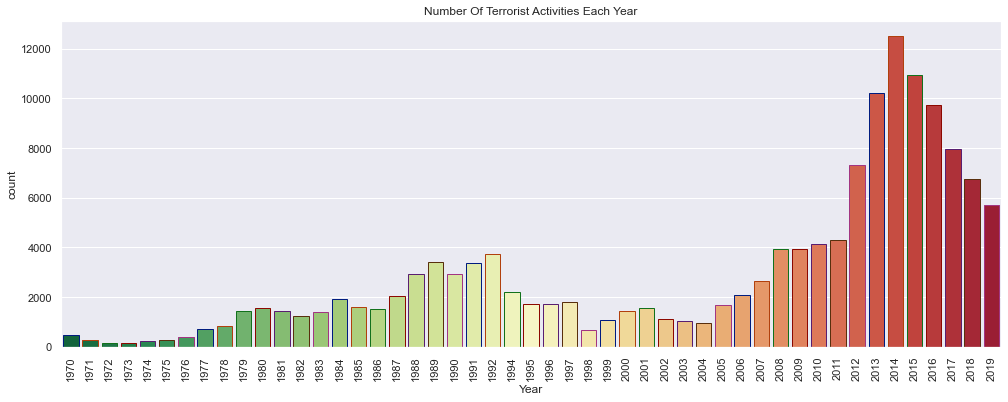

In [21]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

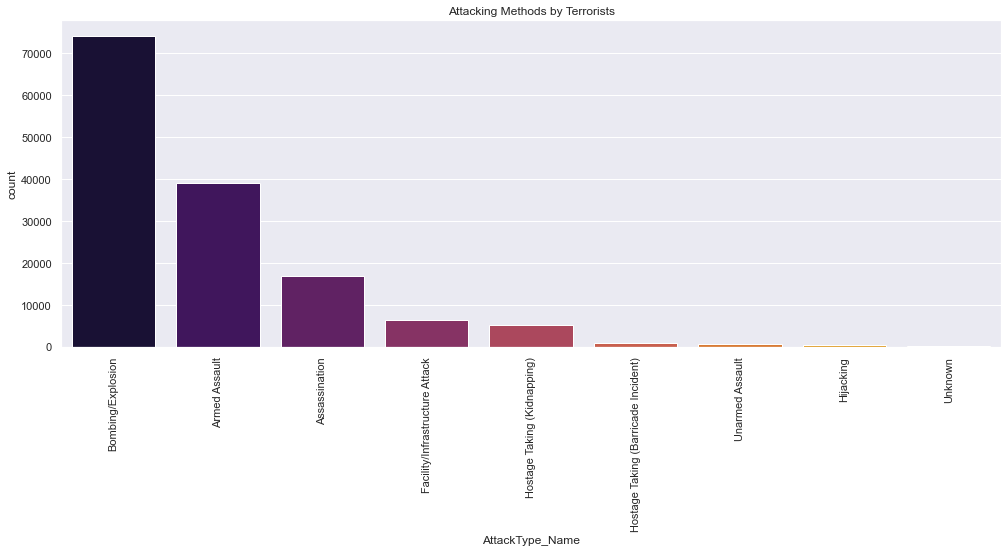

In [22]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType_Name',data=df,palette='inferno',order=df['AttackType_Name'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

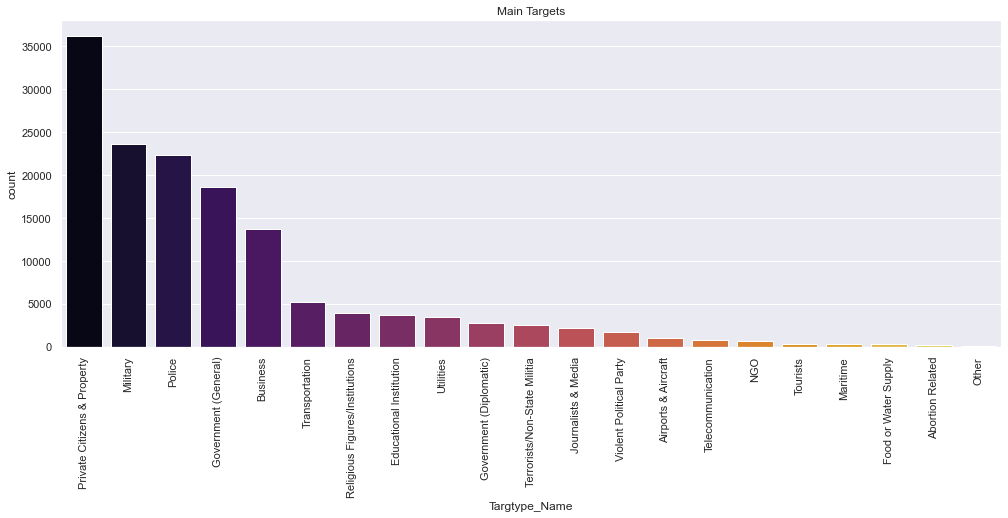

In [23]:
plt.subplots(figsize=(15,6))
sns.countplot(df['Targtype_Name'],palette='inferno',order=df['Targtype_Name'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Main Targets')
plt.show()

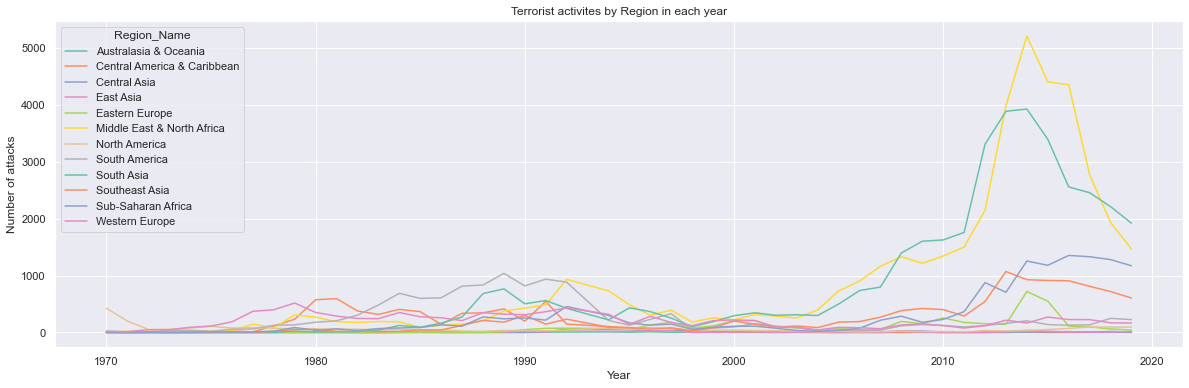

In [24]:
terror_region=pd.crosstab(df.Year,df.Region_Name)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Terrorist activites by Region in each year')
plt.ylabel("Number of attacks")
plt.show()

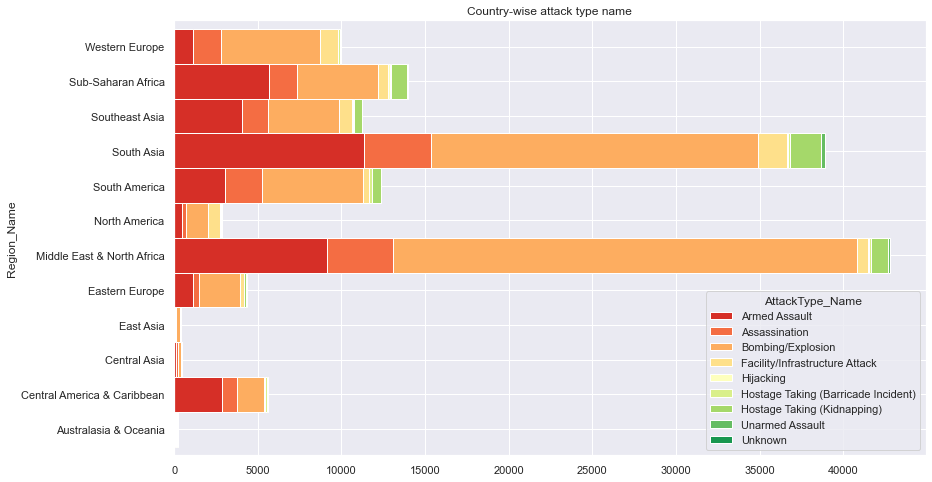

In [25]:
pd.crosstab(df.Region_Name,df.AttackType_Name).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.title('Country-wise attack type name')
plt.show()

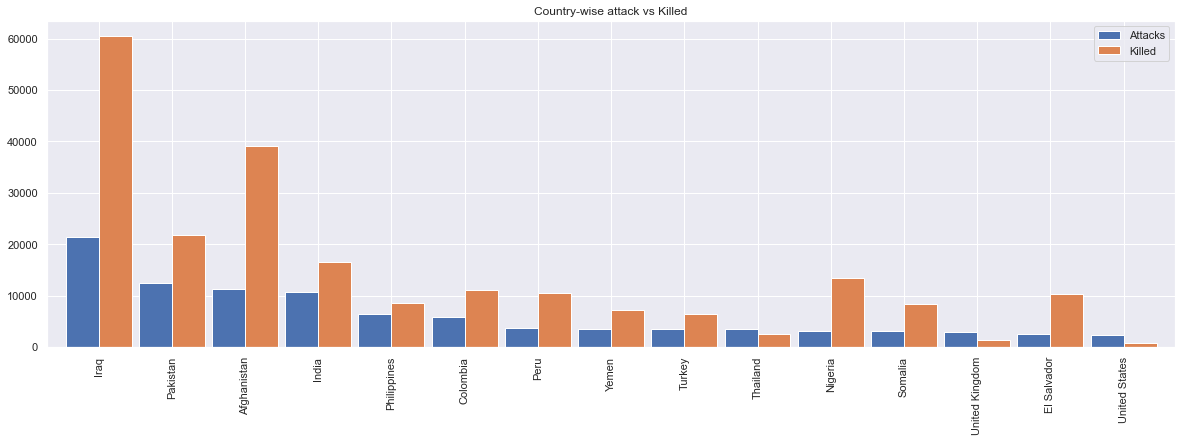

In [26]:
coun_terror=df['Country_Name'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=df.groupby('Country_Name')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Country-wise attack vs Killed')
plt.show()

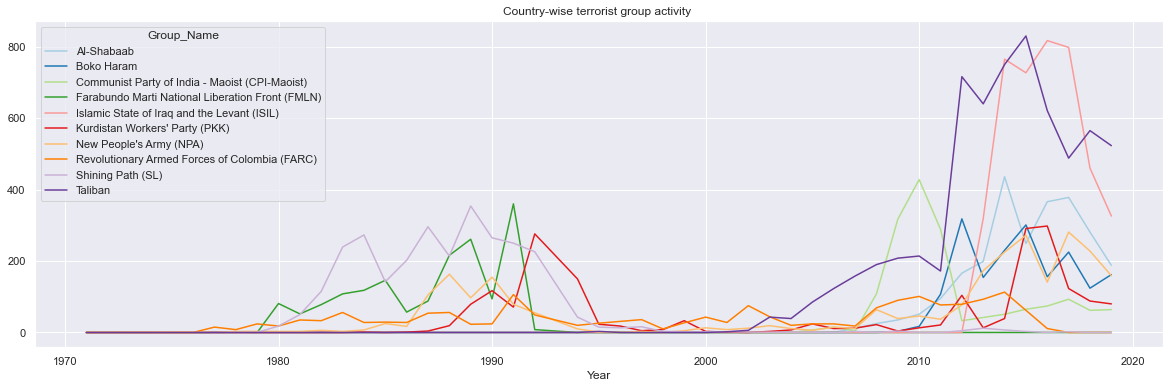

In [27]:
top_groups10=df[df['Group_Name'].isin(df['Group_Name'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group_Name).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Country-wise terrorist group activity ')
plt.show()

#### Objectives

In [29]:
#country = input("Enter Country Name: ")
#country = country.capitalize()
country = 'India'
print("terrorism risk in percentage for every months for", country,"specific input country")
months = dict(df[df.Country_Name == country].groupby(['Month']).size())
months = dict(sorted(months.items(), key = lambda kv:(kv[1], kv[0]), reverse=True))
tot = sum(list(months.values()))
#print("Entered Country: ",country)
for i in months:
    print(i,' {:.2f} %'.format((months[i]/tot)*100))
    
 #It will print terrorism risk in percentage for every months for specific input country.  

terrorism risk in percentage for every months for India specific input country
5  10.01 %
4  9.65 %
8  9.27 %
6  9.05 %
7  8.98 %
11  8.50 %
10  8.27 %
1  8.16 %
3  7.46 %
9  7.05 %
12  6.95 %
2  6.64 %


In [30]:
df['Wounded'] = df['Wounded'].fillna(0).astype(int)
df['Killed'] = df['Killed'].fillna(0).astype(int)
df['casualities'] = df['Killed'] + df['Wounded']

In [31]:
#Taking only 30 countries for visualization of heatmap properly
df_copy = df.sort_values(by='casualities',ascending=False)[:30]

In [32]:
df_copy.corr()

,Year,Month,Day,Country_Code,Region_Code,AttackType_Code,Targtype_Code,Targsubtype_code,Weaptype1_Code,Weapsubtype1_Code,Killed,Wounded,casualities
Year,1.000000,-0.022616,0.048945,0.045452,-0.038496,0.215095,-0.245092,-0.215315,-0.156972,0.046698,-0.023157,-0.154969,-0.169543
Month,-0.022616,1.000000,-0.210724,-0.126661,0.050571,-0.081921,-0.045867,-0.073033,0.326639,-0.084044,-0.000591,0.041523,0.043001
Day,0.048945,-0.210724,1.000000,0.007148,-0.296212,-0.180083,-0.095612,-0.101598,-0.068885,-0.042055,-0.020424,-0.131886,-0.144545
Country_Code,0.045452,-0.126661,0.007148,1.000000,0.044474,0.530184,0.077335,0.108642,-0.070265,-0.131361,0.067344,-0.074916,-0.053913
Region_Code,-0.038496,0.050571,-0.296212,0.044474,1.000000,0.195656,0.262908,0.237010,0.108977,0.131518,0.283075,0.044171,0.147061
AttackType_Code,0.215095,-0.081921,-0.180083,0.530184,0.195656,1.000000,0.117762,0.129772,0.220858,0.264627,-0.165117,0.077147,0.021318
Targtype_Code,-0.245092,-0.045867,-0.095612,0.077335,0.262908,0.117762,1.000000,0.988009,0.003669,0.190315,-0.214682,-0.123134,-0.204811
Targsubtype_code,-0.215315,-0.073033,-0.101598,0.108642,0.237010,0.129772,0.988009,1.000000,-0.047268,0.183159,-0.220166,-0.100453,-0.183166
Weaptype1_Code,-0.156972,0.326639,-0.068885,-0.070265,0.108977,0.220858,0.003669,-0.047268,1.000000,0.236156,0.002580,-0.133167,-0.137662
Weapsubtype1_Code,0.046698,-0.084044,-0.042055,-0.131361,0.131518,0.264627,0.190315,0.183159,0.236156,1.000000,-0.308302,0.153728,0.049879


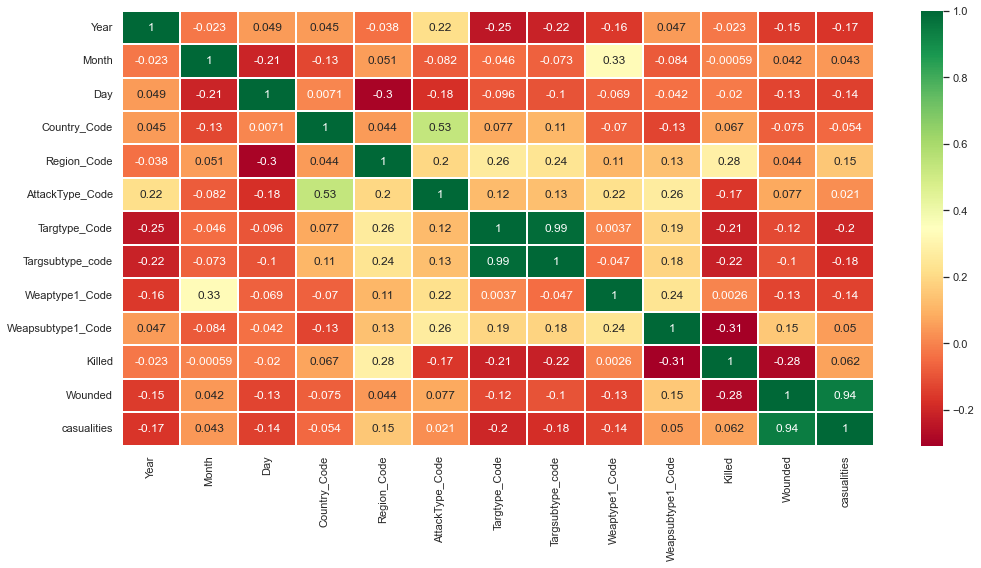

In [36]:
#Generating heatmap for correlation ploy
plt.figure(figsize=[15,8])
sns.heatmap(df_copy.corr(),cmap='RdYlGn', linewidths=0.4, annot=True)
plt.show()

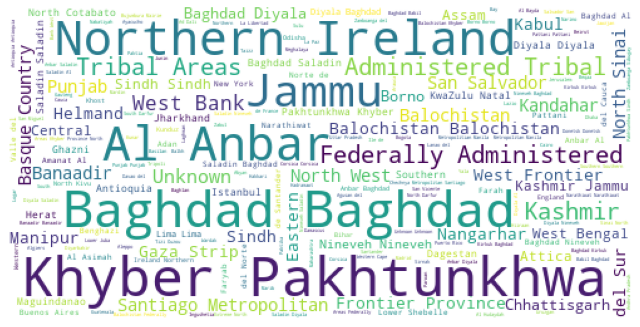

In [34]:
#!pip3 install wordcloud
from wordcloud import WordCloud
from scipy import signal
cities=df.State.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud= WordCloud(background_color='white', width=500, height = 250).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()
